# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

In [9]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
import cv2

In [10]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog (1).jpg


## Part1: K Means

In [11]:
#implement elbow method from scratch
def elbow(X):
    poss_k = range(2, 20)
    sse = [] # sum of squared errors
    for k in poss_k:
        model = KMeans(n_clusters=k)
        model.fit(X)
        sse.append(model.inertia_)
    plt.plot(poss_k, sse, marker = 'o')
    plt.xlabel('Values of K')
    plt.ylabel('Sum of Squared Errors')
    plt.title('The Elbow Method for Optimal K')
    plt.show()
    return


In [12]:
#implement silhouette method from scratch
def silhouette(X):
    poss_k = range(2, 20)
    silhouette = []
    for k in poss_k:
        model = KMeans(n_clusters=k)
        model.fit(X)
        silhouette.append(sklearn.metrics.silhouette_score(X, model.labels_))
    plt.plot(poss_k, silhouette, marker = 'o')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method for Optimal K')
    plt.show()
    return

In [13]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
X_train = trainX.reshape(trainX.shape[0], -1)
X_test = testX.reshape(testX.shape[0], -1)
# you can performs your training on train/test dataset alone if there are computational issues


4422102/4422102 [==============================] - 0s 0us/step


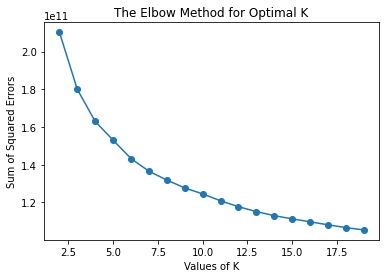

In [14]:
elbow(X_train)

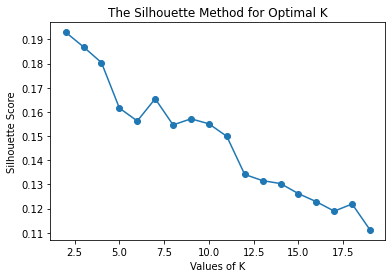

In [15]:
silhouette(X_train)

In [16]:
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_test)
X_pca

array([[-1496.00983608,   640.25284893,   274.39658999, ...,
           11.63785087,   -86.14813139,    52.02888341],
       [ 1865.01695225,  1078.10558142,  -752.38122067, ...,
          -61.14267438,   -81.1209754 ,    47.01822141],
       [  388.77561984, -1532.39576021,   477.72502441, ...,
          -62.64893707,   -59.86923872,   -85.03833121],
       ...,
       [ -505.63063702,  -737.23894603,   151.00444246, ...,
           86.83662146,   -13.07932413,   -30.30196781],
       [ -216.15085485, -1419.71611141,   464.05783677, ...,
          -77.85838876,    89.69620842,   -62.45566386],
       [-1525.82009781,    76.97053521,  -264.8358786 , ...,
          -26.00946768,    15.97386448,   -16.12196168]])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


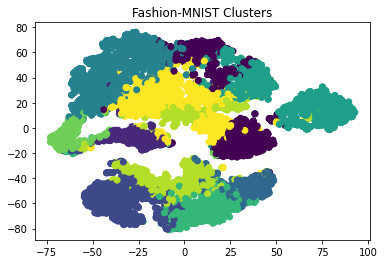

In [17]:
kmeans = KMeans(n_clusters = 10, random_state=31)
labels = kmeans.fit_predict(X_test)

tsne = TSNE(n_components=2, perplexity=30, random_state=31)
X_tsne = tsne.fit_transform(X_pca)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title('Fashion-MNIST Clusters')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


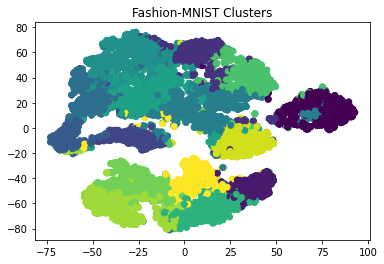

In [18]:
kmeans = KMeans(n_clusters=15, init='random', random_state=31)
labels = kmeans.fit_predict(X_test)

tsne = TSNE(n_components=2, perplexity=30, random_state=31)
X_tsne = tsne.fit_transform(X_pca)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title('Fashion-MNIST Clusters')
plt.show()

## Part2: Hierarchical clustering

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

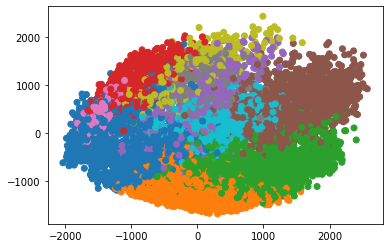

In [20]:
# implement hierarchical clustering ( you can use scikit module) 

def hierarchical_clustering(X_test):


    clustering = AgglomerativeClustering(n_clusters=10)
    clustering.fit(X_test)

    pca = PCA(n_components=2)
    pca.fit(X_test)
    embedding = pca.transform(X_test)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=clustering.labels_, cmap='tab10')
    plt.show()


hierarchical_clustering(X_test)


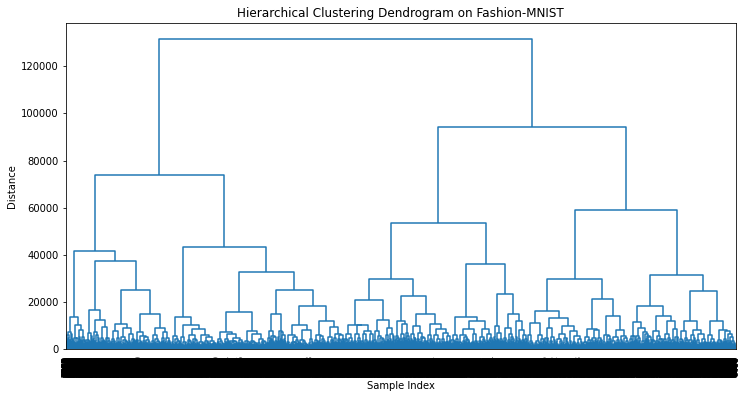

In [21]:
#visualize a dendogram

def dendogram(X_test):
    Z = linkage(X_test, method='ward')

    plt.figure(figsize=(12, 6))
    dendrogram(Z, leaf_font_size=8, color_threshold=50)
    plt.title('Hierarchical Clustering Dendrogram on Fashion-MNIST')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

dendogram(X_test)

  

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

***Answer***: The procedure to find the optimal number of clusters using dendogram includes finding that level of the </br>
Dendogram where the clusters merge leading to maximum distance between the clusters.</br></br>
Procedure to find the optimal number of clusters would involve the following steps:- </br>
    1. Calculate distance between the different clusters represented as vertical lines in the dendogram</br>
    2. Find the maximum distance between the clusters</br>
    3. Find the level of the dendogram where the clusters merge leading to maximum distance between the clusters</br>
    4. The number of clusters would be equal to the number of vertical lines in the dendogram at that level</br>
</br>






In [22]:
#visualisation of clusters using single linkage and complete linkage

single_clustering = AgglomerativeClustering(n_clusters=10, linkage='single')
single_clustering.fit(X_test)

AgglomerativeClustering(linkage='single', n_clusters=10)

In [23]:
complete_clustering = AgglomerativeClustering(n_clusters=10, linkage='complete')
complete_clustering.fit(X_test)

AgglomerativeClustering(linkage='complete', n_clusters=10)

In [24]:
tsne = TSNE(n_components=2, random_state=31)
X_tsne = tsne.fit_transform(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 'Single Linkage')

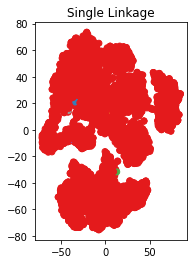

In [25]:

plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=single_clustering.labels_, cmap='Set1')
plt.title('Single Linkage')

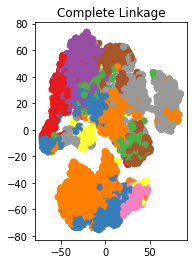

In [26]:
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=complete_clustering.labels_, cmap='Set1')
plt.title('Complete Linkage')

plt.show()

**Question:** Mention the differences observed using single and complete linkage:

Answer: Single and Complete linkage are the 2 methods of grouping the data points closed to each other when we do heiarchical clustering. </br>Single linkage clustering uses the minimum distance between any two points in different clusters to define the distance between the clusters.complete linkage clustering uses the maximum distance between any two points in different clusters to define the distance between the clusters.
</br>For our data set, when we were performing clustering using single linkage, we observe that resulting clusters tend to be elongated, whereas in complete linkage, the resulting clusters are more spearated and compact.
</br>

## Part3: Image Compression

In [27]:
def size_compute(height, width, channels,k):
    return k * 24 + height * width * channels * np.ceil(np.log2(k))


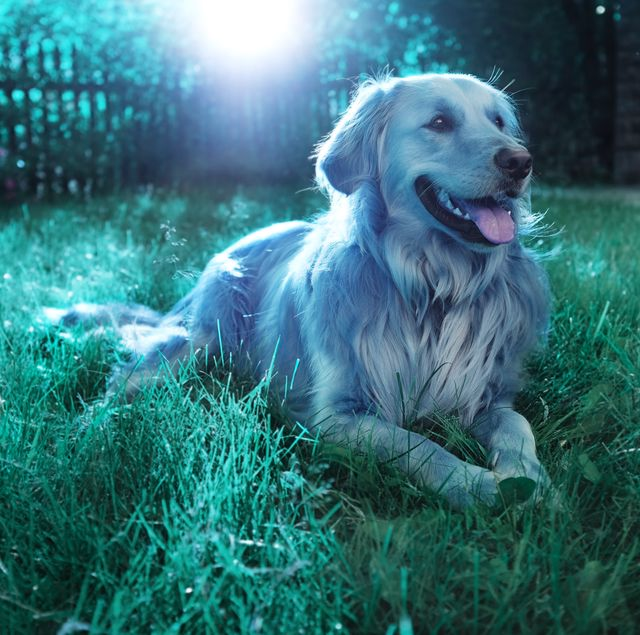

In [28]:
# Boiler plate code
from google.colab.patches import cv2_imshow

img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])


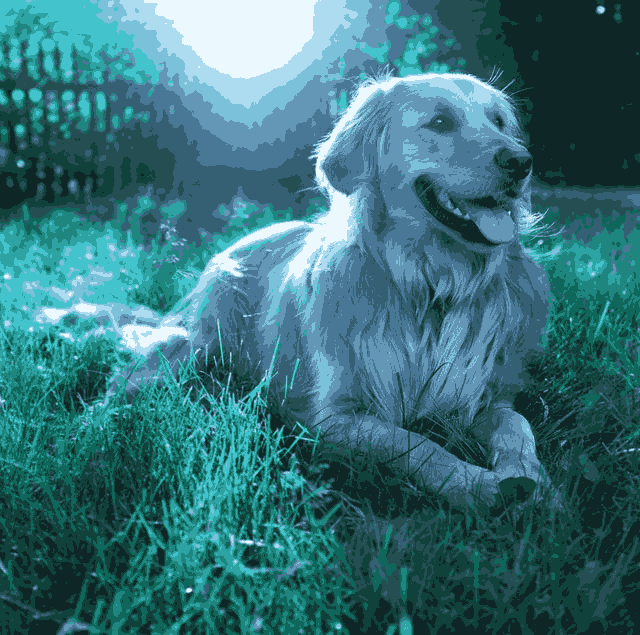

Compressed Image (4877112 bits)


In [29]:
# import cv2_imshow
k = 13
height, width, channels = (635, 640, 3)  
kmeans = KMeans(n_clusters=k, max_iter=600)
kmeans.fit(X)
imgcomp = kmeans.cluster_centers_[kmeans.labels_]
imgcomp = imgcomp.reshape((height, width, channels))
cv2_imshow(imgcomp)
print('Compressed Image ({} bits)'.format(int(size_compute(height, width, channels,k))))